In [1]:
### Header
# Jared Gibbs
# 3/25/25
# Property Tax App

In [2]:
### NOTES
"""
- Questions:
    - How does the county assessting and collecting levy get set?
    - How are district boundaries tracked?
    - 

- [59-2-1603] State auditor 'shall annually conduct a study of each county of the fourth, fifth, or sixth class to determine:
     (a) the costs of assessing and collecting property taxes;
     (b) the ability to generate revenue from an assessing and collecting levy; and
     (c) the tax burden of levying a property tax sufficient to cover the costs of assessing and collecting property taxes. 
        Can I get these reports? Talk to Seth Oveson from Auditor's Office? https://auditor.utah.gov/about-us/directory/
    
- Property Tax Policy Vairables:
    - Tax Rate (cretified rate vs marginal rate)
    - Primary residential exemption threshold
    - Curcuit Breaker?
    - Tax Credits?
    
- Functionalities:
     - Model Changes in tax rate
     - Model Changes in exemption(s)
     - Tax incidence by property type
     - Tax incidence by income?
     - Variable geographic resolution
     - Map graphics?
     - Sankey for where property taxes are levied and where they go?

- Create an index to explain each variable?

- Tax flows:
    - County/ municipal             ->  local government(s)
    - County assessment levy        ->  promote the efficient administration of the property tax system
    - Mulitcounty assessment levy   ->  18% (up to $500,000) to Property Tax Valuation Fund, rest to Multicounty Appraisal Trust 
    - School district               ->  school districts
    - Special districts             ->  special district
        
- Resources
    - Tax Area Nomenclature https://propertytax.utah.gov/rates/nomenclature/
    - Property Tax Levies Statutory Authority and Maximums https://propertytax.utah.gov/tax-rates/property-tax-levies.pdf
    - Final Countywide Taxable Values Report 233b (Form PT-200) https://propertytax.utah.gov/form/pt-200.pdf
      
    - HvPlot User Guide https://hvplot.holoviz.org/user_guide/index.html
    - HoloViz Tutorial https://holoviz.org/tutorial/index.html
    
    - OLAG property tax audit: https://olag.utleg.gov/olag-doc/2024-05_RPT.pdf

    - CSS option Referance https://www.w3schools.com/cssref/index.php
        
        
        
"""

"\n- Questions:\n    - How does the county assessting and collecting levy get set?\n    - How are district boundaries tracked?\n    - \n\n- [59-2-1603] State auditor 'shall annually conduct a study of each county of the fourth, fifth, or sixth class to determine:\n     (a) the costs of assessing and collecting property taxes;\n     (b) the ability to generate revenue from an assessing and collecting levy; and\n     (c) the tax burden of levying a property tax sufficient to cover the costs of assessing and collecting property taxes. \n        Can I get these reports? Talk to Seth Oveson from Auditor's Office? https://auditor.utah.gov/about-us/directory/\n    \n- Property Tax Policy Vairables:\n    - Tax Rate (cretified rate vs marginal rate)\n    - Primary residential exemption threshold\n    - Curcuit Breaker?\n    - Tax Credits?\n    \n- Functionalities:\n     - Model Changes in tax rate\n     - Model Changes in exemption(s)\n     - Tax incidence by property type\n     - Tax incidence

In [3]:
### To Do list 
"""
General
    Dynamic map wrapper?
    District Map
    
    Count Timeseries
    Average TimeSeries
    Average profiles
    
    Discussion of Truth in Taxation
        How does it work?
        Tooele City as impirical example of TnT in action
        Implications for the taxpayer
        Why are my taxes going up?

    Modeling Page
    Reorganize Statewide comparison page
    Reorganize entity profile page



Double Checking
    review ratio calcualtions for early years
    cross check app results with taxing entitiy budget information
    review personal property revenue calcuations

    

Modeling
    Decompose value growth due to increase in stock vs increase in value
        dicussion of truth in taxation implications for individual taxpayers 
    Policy Variables:
        Statewide marginal property tax change
        Change to the primary residential exemption



Additional Research
    Curcuit Breaker
    Existing Targeted property tax breaks

"""

'\nGeneral\n    Dynamic map wrapper?\n    District Map\n    \n    Count Timeseries\n    Average TimeSeries\n    Average profiles\n    \n    Discussion of Truth in Taxation\n        How does it work?\n        Tooele City as impirical example of TnT in action\n        Implications for the taxpayer\n        Why are my taxes going up?\n\n    Modeling Page\n    Reorganize Statewide comparison page\n    Reorganize entity profile page\n\n\n\nDouble Checking\n    review ratio calcualtions for early years\n    cross check app results with taxing entitiy budget information\n    review personal property revenue calcuations\n\n    \n\nModeling\n    Decompose value growth due to increase in stock vs increase in value\n        dicussion of truth in taxation implications for individual taxpayers \n    Policy Variables:\n        Statewide marginal property tax change\n        Change to the primary residential exemption\n\n\n\nAdditional Research\n    Curcuit Breaker\n    Existing Targeted property tax

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
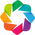

:Image   [x,y]   (z)

In [4]:
### Libraries and Imports

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datashader, hvplot, param, holoviews as hv
import geoviews as gv
import panel as pn
import colorcet as cc
from colorcet.plotting import swatch, swatches
hv.extension('bokeh', 'matplotlib')
import hvplot.pandas
import pathlib

df_cleandata = pd.read_csv('property_cleandata.csv')
#df_cleandata_county = pd.read_csv('property_cleandata_county.csv')

df_working = pn.rx(df_cleandata)
#df_working_county = df_cleandata_county

#Set up colors and colormaping
highlight = '#196B24'
alt_highlight ='#8b4aa8'

base_colors = ['#196B24', '#8b4aa8', '#767167', '#bcb4a5', '#171615',  '#2f2d29', '#47443e', '#5e5a52', '#8d877c', '#a59e90', '#d4cbb9', '#ebe1ce']
swatch(name= 'base_colors', cmap = base_colors)

In [5]:
### Set Up Widgets et al

entites = df_cleandata['entity_name'].unique().tolist()
entity_types = df_cleandata["entity_type"].unique().tolist()
counties = df_cleandata['county_name'].unique().tolist()
#counties.remove("Statewide")

property_types = ['Primary Residential', 'Non-primary Residential', 'Commercial', 'Agricultural', 'Unimproved', 
                  'Personal Property', 
                  'Centrally Assessed']

property_share_types = ['Primary Residential, Percent', 'Non-primary Residential, Percent', 'Commercial, Percent', 'Agricultural, Percent', 'Unimproved, Percent',
                  'Personal Property, Percent', 
                  'Centrally Assessed, Percent']

property_average_types = ['Primary Residential, average', 'Non-primary Residential, average', 'Commercial, average', 'Agricultural, average', 'Unimproved, average', 
                  'Personal Property, average']




entitiy_widget = pn.widgets.AutocompleteInput(name = "Entitiy", options = entites, case_sensitive = False, value = 'Beaver')
entity_type_widget = pn.widgets.MultiSelect(name= 'Taxing Entity Type', options= entity_types, value = ['County'])
county_widget = pn.widgets.MultiSelect(name = 'County', options = counties, value = counties)
tax_year_widget = pn.widgets.EditableIntSlider(name = 'Tax Year', fixed_start= 2014, fixed_end = 2024, step = 1, value = 2024 )
share_vs_values_widget = pn.widgets.Select(name = 'Display Type', options=['Share', 'Values'], value='Share')
sort_share_widget = pn.widgets.Select(name = 'Ratio Sort by', options = property_share_types)
sort_value_widget = pn.widgets.Select(name = 'Value Sort by', options = property_types)
ascending_widget = pn.widgets.Switch(name= 'Ascending?')


# Page Buttons
frontpage_button = pn.widgets.Button(name = "Home Page", 
                                     icon = 'home', 
                                     icon_size = '24px', 
                                     height = 50, 
                                     styles={"width": "100%", "border-style": "outset"})

entityprofile_button = pn.widgets.Button(name = 'Entity Profiles', 
                                         icon = 'file-info', 
                                         icon_size = '24px', 
                                         height = 50, 
                                         styles={"width": "100%", "border-style": "outset"})

statewidecomp_button = pn.widgets.Button(name = "Statewide Comparison",
                                          icon = 'layers-difference', 
                                          icon_size = '24px', 
                                          height = 50, 
                                          styles={"width": "100%", "border-style": "outset"})

modeling_button = pn.widgets.Button(name = "Modeling",
                                     icon = 'alpha',
                                       icon_size = '24px', 
                                       height = 50, 
                                       styles={"width": "100%", "border-style": "outset"})





In [6]:
### Extract Key Variables/ Indicators

indicator_realproperty = df_working.loc[(df_working.entity_name == entitiy_widget) & (df_working['Tax Year'] == tax_year_widget), 'Total Property'].max()
indicator_realrevenue = df_working.loc[(df_working.entity_name == entitiy_widget) & (df_working['Tax Year'] == tax_year_widget), 'Revenue, Total Property'].max()
indicator_realrate = df_working.loc[(df_working.entity_name == entitiy_widget) & (df_working['Tax Year'] == tax_year_widget), 'Real Tax Rate'].max()
#indicator_


In [7]:
### Stacked Bar Chart for Ratio and Value of Property Types by County

ratio_chart = df_working[(df_working.entity_type.isin(entity_type_widget)) & (df_working['Tax Year']==tax_year_widget) & (df_working['county_name'].isin(county_widget))].sort_values(by=sort_share_widget, ascending = ascending_widget).hvplot.barh(
                        x ="entity_name", 
                        y = property_share_types, 
                        stacked = True,
                        #rot = 60,
                        legend = False,
                        color = base_colors,
                        #frame_height = 1000,
                        #frame_width = 1400,
                        title = "Ratio of Property Types by Taxing Entity",
                        xlabel = 'Taxing Entity',
                        ylabel = 'Taxable Value, Percent',
                        responsive = True).opts(shared_axes= False)

value_chart = df_working[(df_working.entity_type.isin(entity_type_widget)) & (df_working['Tax Year']==tax_year_widget) & (df_working['county_name'].isin(county_widget))].sort_values(by=sort_value_widget, ascending = ascending_widget).hvplot.barh(
                        x ="entity_name", 
                        y = property_types, 
                        stacked = True,
                        #rot = 60,
                        legend = False,
                        ylabel = 'Taxable Value (B)',
                        xlabel = 'Taxing Entity',
                        color = base_colors,
                        #frame_height = 1000,
                        #frame_width = 1400,
                        title = "Value of Property Types by Taxing Entity",
                        responsive = True).opts(shared_axes= False)



In [8]:
### Property Tax, a Primer

# INSERT HEADER VISUALS
# Write a discussion of 'Truth in Taxation' 

real_property_primer = pn.Card(
    pn.pane.Markdown(""" 
        Real Property refers to the land itself and improvements upon that land (59-2-102 (18), (32)). 
        In this context, 'improvements' refer generally to buildings or structures attached to the land in a way which is permanent over the useful life of the property.
        The manner in which real property is taxed depends on the particular type of property at issue, but generally it is levied as a percentage rate on the fair market value of the property.
        See the categories below for more detail. 
            """,styles = {'font-size': '16px'}),
    pn.layout.Accordion(
    #General Description of Real Property
          # Land and improvements to the land as defined in 59-2-102 (18), (32)
    ('Primary Residential', pn.pane.Markdown(""" 
                Primary residential property includes things like single family homes, duplexes, or other kinds of owner-occupied housing.
                It is defined in code as "any property used for residential purposes as a primary residence" (59-2-102(34)).
                The state constitution, among other property tax exemptions, carves out an exemption for up to 45% of the value of residential property (art. XIII, §3).
                At present, statute sets this exemption at the maximum allowed (59-2-103(3)), meaning that individuals pay taxes on 55% of their property's market value, rather than on the full value. 
            """,styles = {'font-size': '14px'})),
    ('Non-primary Residential', pn.pane.Markdown(""" 
                Non-primary residential property includes all property classified as residential but not used as a primary residence.
                This may include second homes, vacation properties, rental buildings etc.
                Current statute excludes non-primary residential property from receiving the 45% exemption (59-2-103(6)) and so is taxed at 100% of market value.
            """,styles = {'font-size': '14px'})),
    ('Commercial', pn.pane.Markdown(""" 
                Commercial property are those lands and improvements which are used for industrial or commercial purposes.
                Things like factories, office buildings, or department stores are all classified as commercial property for the purposes of taxation and are taxed at 100% of market value.
            """,styles = {'font-size': '14px'})),
    ('Agricultural', pn.pane.Markdown(""" 
                Agricultural or FAA (Farmland Assessment Act) property, in contrast to other types of real property, is assessed based on its value for agricultural production rather than its market value (59-2-503).
                This may include land used to grow useful plants or raise livestock as defined in code.  
            """,styles = {'font-size': '14px'})),
    ('Unimproved', pn.pane.Markdown(""" 
                Unimproved or vacant property is land which has not been built upon or utilized. It is taxed at 100% of market value. 
            """,styles = {'font-size': '14px'}))
    ),
                              title = 'Real Property',
                              collapsed = True,
                              sizing_mode = 'stretch_width')

personal_property_primer = pn.Card(
    pn.pane.Markdown(""" 
        Personal Property is a broad category which includes everything from passenger cars to business equipment to mobile homes. 
        While state code sets out the few explicit classifications (which are described below), it delegates rulemaking authority to the Tax Commission to create and maintain classifications for all other types of personal property (59-2-107).
        Due to the complexity, the intricacies of these classifications are not described here and can instead be found in the Commission's valuation guidelines: https://propertytax.utah.gov/personal/valuation-guidelines/
            """,styles = {'font-size': '16px'}),
    pn.layout.Accordion(
    #General Description of Personal Property
          # taxable property that is not real or centrally assessed
    ('Age-based Property', pn.pane.Markdown(""" 
                Property subject to the age-based fee includes most vehicles such as passenger vehicles, motorcycles, vessels (under 31 ft), trailers, etc. (59-2-405). 
                Rather than being assessed a percentage of the market value, age-based fees— as the name implies— levy a fixed charge against the underlying property. 
                Generally paid concurrent with the vehicle's registration, the amount of the fee is determined by the property's age and type.
                For example, passenger vehicles face a different fee schedule that motorcycles.
                In all cases, the older a piece of property is, the smaller the associated fee. 
                The full collection of fee schedules can be found on the Tax Commission's website: https://dmv.utah.gov/taxes-fees/uniform-fees 
            """,styles = {'font-size': '14px'})),
    ('Fee-in-lieu Property', pn.pane.Markdown(""" 
                All vehicles not subject to the age-based fee, are instead subject to the fee-in-lieu. 
                This fee is assessed as a percentage (1.5 or 1.0 depending on vehicle type) of the market value of the vehicle.
                This classification covers medium and heavy trucks, commercial trailers, vessels (31 ft or longer), and motor homes.
            """,styles = {'font-size': '14px'})),
    ('Mobile Home', pn.pane.Markdown(""" 
                Mobile or manufactured homes are defined and classified similarly to residential property, including the distinction between primary and non-primary use.
                However, because such homes are ostensibly able to be moved to another site, they are not permanent improvement to the land over the useful life of the property.
                As such, mobile homes are considered personal property rather than real property.
                Even so, the 45% exemption enjoyed by primary residential property would also be enjoyed by a mobile home provided it is used as a primary residence.
                Otherwise, the property is taxed at 100% of market value.
            """,styles = {'font-size': '14px'}))
    ),
                              title = 'Personal Property',
                              collapsed = True,
                              sizing_mode = 'stretch_width')

central_property_primer = pn.Card(
    pn.pane.Markdown(""" 
        Centrally assessed property is primarily distinguished from other types of property since it is the Tax Commission rather than the counties which is responsible for assessment.
        State code lays out the specific types of property that the Commission is directly responsible for including that of public utilities, mobile flight equipment, geothermal resources, mines, or other property which "operates as a unit across county lines" (59-2-201).
        Each property is assessed as a whole before the value is apportioned among the taxing entities in which the property is located.
        For example, a railroad that runs through multiple counties, municipalities, school districts, etc. is assessed on its totality by the Commission, then the Commission determined what part of that total value is taxable by each entity in which the property exists. 
        The taxing entities then levy their rates on the taxable value which has been apportioned to them. 
            """,styles = {'font-size': '16px'}),
                              title = 'Centrally Assessed',
                              collapsed = True,
                              sizing_mode = 'stretch_width')

property_primer = pn.Column('# Property Tax, A Primer',
                            pn.layout.Divider(),
                            pn.pane.Markdown("""
     In Utah, taxable property is divided into one of three broad categories as set out in statute: *real property*, *personal property*, and *centrally assessed property*. 
     Of those, the first two are locally assessed, meaning that property is evaluated at the county level.
     This distinction in the code reflects how the property is used or structured; property that operates as a cohesive whole across multiple jurisdictions is assessed as a cohesive whole.
     A railroad network, for example, does not operate only in a single county and so is assessed at the state level rather than locally. 
     By contrast, something that is fixed in place or registered with a single county (like a home, a business, or a vehicle) is assessed by that county.
     Click on the property types below to learn more.
""",
styles = {'font-size': '20px'}),
pn.layout.Divider(),
pn.layout.Column(real_property_primer, personal_property_primer, central_property_primer),
pn.layout.Divider()
)




In [9]:
### Truth in Taxation Primer

'''
    Among governmental funding mechansims, property taxes feature prominently.
Like other kinds of taxes, levies on property are generally strucutred as a rate that is charged against the underlying value being taxed.  
In the case of property taxes, that rate is assessed against the value of the property in question.
For example, a local government might set a rate of .001% which would create a tax lability of $400 against a home worth $400,000.
Importantly, the general strucutre of such taxes is to set the tax rate directly just like is done with a sales tax or an income tax. 
In the case of property however, this structure creates a subtle problem. 
Property, particularly real property, has a habit of appriciating in value. 
Mostly, this is a good thing for the owner of the property since they can leverage the appriciated value for whatever purposes they deem worthwhile. 
They might borrow against the higher value, liquidate it by selling the property, or benefit from a number of other more complex financial products.
However, in the event that the owner does not wish to part with their property for whatever reason, such as wanting to continue living in the house that they have owned for decades, a property tax which is strucutred as decribed here creates a situation wherein the tax liabilty continutly increases as the property apprciates in value.
This can be problematic for two reasons.
First, it in effect raises taxes on a regular basis. 
The reason being that with a fixed rate, tax burden rises as value appriciates. If the home from the previous example were to increase in value to $500,000, the tax on it would rise to $500.
This is different from something like a sale tax where, when the rate is held constant, aggregate liabilty would rise due to an individual choosing to increase consumption.
With property taxes, fixed rates cause tax liabilty to increase almost automatically. 
Second, in general, the pattern of wealth over an individual's life is for it to increase with time until an inflection point where one's wealth begins declining. 
This pattern is driven by individuals on net building wealth over the early and middle decades of life by earning income and accumulating assests, and drawing down that wealth in the decades follwing retirement.
As a consequence, there comes a point in the typical wealth profile where one's ability to pay increasing property tax liability diminishes at the same time that tax burden continues increasing due to value appriciation.

    Here in Utah however, we do things a little bit differntly. 
Property taxes at all levels are contrained by a process called 'Truth in Taxation.' 
It takes the ordinary tax paradigm and flips it on its head.
The basic concept behind Truth in Taxation is to set the revenue to be raised, rather than setting the rate to charge.
More specifically, property tax rates are explicitly strucutred to float up and down in response to changes in the underlying taxable value. 
For example, if the house increases in value to $500,000, the rate would fall to .008% to maintain the same $400 of tax liabilty. 
If one aggregates the value of all taxable property in a juristiction and adjusts the rate levied by that juristiction to keep revenue constant, then one is following the basics of Truth in Taxation.



'''


"\n    Among governmental funding mechansims, property taxes feature prominently.\nLike other kinds of taxes, levies on property are generally strucutred as a rate that is charged against the underlying value being taxed.  \nIn the case of property taxes, that rate is assessed against the value of the property in question.\nFor example, a local government might set a rate of .001% which would create a tax lability of $400 against a home worth $400,000.\nImportantly, the general strucutre of such taxes is to set the tax rate directly just like is done with a sales tax or an income tax. \nIn the case of property however, this structure creates a subtle problem. \nProperty, particularly real property, has a habit of appriciating in value. \nMostly, this is a good thing for the owner of the property since they can leverage the appriciated value for whatever purposes they deem worthwhile. \nThey might borrow against the higher value, liquidate it by selling the property, or benefit from a n

In [10]:
### Taxable Value Time Series
ratio_timeseries = df_working[df_working.entity_name==entitiy_widget].hvplot.line(
    x = "Tax Year", 
    y = property_share_types, 
    ylabel = 'Taxable Value, Percent',
    title = 'Property Type Shares',
    color = base_colors,
    responsive=True).opts(shared_axes=False)

### County Taxable Value Time Series
value_timeseries = df_working[df_working.entity_name==entitiy_widget].hvplot.line(x = "Tax Year", 
    y = property_types,
    ylabel = 'Taxable Value (B)',
    title = 'Property Type Value',
    color = base_colors,
    responsive=True).opts(shared_axes=False)


In [11]:
### Average Timeseries
average_timeseries = df_working[df_working.entity_name==entitiy_widget].hvplot.line(
    x = "Tax Year", 
    y = property_average_types, 
    ylabel = 'Average Value',
    title = 'Property Type Averages',
    color = base_colors,
    responsive=True).opts(shared_axes=False)

In [12]:
### Revenue, Rate Timeseries

revenue_timeseres = df_working[df_working.entity_name == entitiy_widget].hvplot.line(
    x = "Tax Year",
    y = ["Revenue, Total Property"],
    title = 'Entity Revenue',
    color = base_colors,
    responsive = True).opts(shared_axes = False)

rate_timeseres = df_working[df_working.entity_name == entitiy_widget].hvplot.line(
    x = "Tax Year",
    y = ["Real Tax Rate"],
    title = 'Entity Tax Rate',
    color = base_colors,
    responsive = True).opts(shared_axes = False)

In [13]:
### Histograms, Real tax Rate

taxrate_histogram = df_working[(df_working.entity_type.isin(entity_type_widget)) & (df_working['Tax Year']==tax_year_widget)].hvplot.hist("Real Tax Rate", 
    bins = 50,
    color = highlight,
    ylabel = 'Count',
    xlabel = 'Tax Rate',
    title = "Distribution of Entity Tax Rate",
    hover_cols = [])

property_histogram = df_working[(df_working.entity_type.isin(entity_type_widget)) & (df_working['Tax Year']==tax_year_widget)].hvplot.hist("Total Property", 
    bins = 50,
    color = highlight,
    ylabel = 'Count',
    xlabel = 'Taxable Value (B)',
    title = "Distribution of Property Value",
    hover_cols = [])

realrevenue_histogram = df_working[(df_working.entity_type.isin(entity_type_widget)) & (df_working['Tax Year']==tax_year_widget)].hvplot.hist("Revenue, Total Property", 
    bins = 50,
    color = highlight,
    ylabel = 'Count',
    xlabel = 'Entity Revenue (M)',
    title = "Distribution of Entity Revenue",
    hover_cols = [])

realrevenue_histogram

BokehModel(combine_events=True, render_bundle={'docs_json': {'2a9b8848-d469-4dd8-9c2c-715d2417f786': {'version…

In [ ]:
### Build App Layout 
# Build Panes
indicators = pn.Column(
    pn.Card(pn.indicators.Number(value = indicator_realrevenue, format = '{value:.3f}'), title = 'Total Revenue (M)'),
    pn.Card(pn.indicators.Number(value = indicator_realproperty, format = '{value:.3f}'), title = 'Total Taxable Property (B)'),
    pn.Card(pn.indicators.Number(value = indicator_realrate, format = '{value:.3f}%'), title = 'Real Tax Rate')
    )

property_type_timeseries = pn.Column(
    pn.Card(pn.pane.HoloViews(ratio_timeseries), title = 'Ratio'), 
    pn.Card(pn.pane.HoloViews(value_timeseries), title = 'Value'))

rate_revenue_timeseres = pn.Column(
    pn.Card(pn.pane.HoloViews(rate_timeseres), title = 'Tax Rate Timeseries'),
    pn.Card(pn.pane.HoloViews(revenue_timeseres), title = 'Revenue Timeseries'))

# Page Switching Function
def show_page(page_key):
    main_area.clear()
    main_area.append(mapping[page_key])

# Initalize Button Connections
frontpage_button.on_click(lambda event: show_page("frontpage"))
entityprofile_button.on_click(lambda event: show_page("entityprofile"))
statewidecomp_button.on_click(lambda event: show_page("statewidecomp"))
modeling_button.on_click(lambda event: show_page("modeling"))

# Create pages
def createpage_frontpage():
    return pn.Column(property_primer)

def createpage_entityprofile():
    return pn.Column(pn.Row(pn.pane.Str(entitiy_widget, styles = {'font-size':'48pt', 'font-weight':' 900'}, align = ('center' ,'center'))),
                     pn.layout.Divider(),
                    pn.Row(pn.Column(entitiy_widget, tax_year_widget, indicators),
                    rate_revenue_timeseres, 
                    property_type_timeseries))

def createpage_statewidecomp():
    return pn.Column(pn.Row(pn.pane.Markdown('# Statewide Comparison')),
    pn.layout.Divider(),
    pn.Row(county_widget, entity_type_widget, tax_year_widget, sort_share_widget, sort_value_widget, ascending_widget),
    pn.Card(pn.pane.HoloViews(ratio_chart), title = 'Ratio'), 
    pn.Card(pn.pane.HoloViews(value_chart), title = "Taxable Value"))

def createpage_modeling():
    return pn.pane.Markdown('# In Progress')

# Set up page mapping
mapping = {
    "frontpage": createpage_frontpage(),
    "entityprofile": createpage_entityprofile(),
    "statewidecomp": createpage_statewidecomp(),
    "modeling": createpage_modeling(),
}

# set up page chunks
main_area = pn.Column(mapping["frontpage"], styles={"width":"100%"})

sidebar_default = pn.Column(pn.pane.PNG("LFA Logo w text.png", width = 250, height = 100, align = ('center', 'center')), 
                    #pn.pane.Markdown("# Pages", align = ('center', 'center')), 
                    frontpage_button, 
                    entityprofile_button, 
                    statewidecomp_button, 
                    modeling_button, 
                    styles={"width": "100%", "padding": "15px"})

# Initalize template
pn.extension(design = 'material')

template = pn.template.MaterialTemplate(
    title = 'Property Tax App',
    header_background = 'Black',
    #logo = "LFA Logo.png",
    sidebar = [sidebar_default],
    sidebar_width = 400,
    main = [main_area]
)

template.show()

Launching server at http://localhost:58246
